In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anyas-gojo-revival-space-shop/sample_submission.csv
/kaggle/input/anyas-gojo-revival-space-shop/test.tsv
/kaggle/input/anyas-gojo-revival-space-shop/train.tsv


In [2]:
train_data = pd.read_csv('/kaggle/input/anyas-gojo-revival-space-shop/train.tsv', sep='\t')
test_data = pd.read_csv('/kaggle/input/anyas-gojo-revival-space-shop/test.tsv', sep='\t')


In [3]:
test_data

,date,time,id,reviewer name,reviewer address,contact number,variation,verified_reviews,feedback
0,29-Jul-18,16:47:11,6074908,Russell Hensley,"9059 Morales Run Suite 912\nSouth Charles, MH ...",6932290613,Heather Gray Fabric,I have the original Alexa and the Tap and so f...,1
1,28-Jul-18,17:49:58,1159008,Adam Baxter,"13728 Jones Mission Apt. 526\nSouth Tylerfurt,...",385-994-9458,Black Plus,Great product. More skills are needed. I love it.,1
2,30-Jul-18,16:46:29,1759753,Sarah Contreras,"7113 Pratt Plains\nPalmermouth, IN 02370",(738)354-8387,Configuration: Fire TV Stick,I will never buy anything Amazon makes again!T...,0
3,29-Jul-18,19:23:32,1861422,Tim Castillo,"93586 Cook Union Apt. 080\nMorganmouth, WI 51175",(294)877-6223,Black Plus,Not perfect but very good! A few times Alexa p...,1
4,28-Jul-18,16:15:25,3116018,Barry Young,69809 Harrington Meadows Apt. 256\nLake Courtn...,262-863-1391,Black Show,Kids like it for games. Showing the lyrics fo...,1
...,...,...,...,...,...,...,...,...,...
625,26-Jul-18,07:35:53,6856853,Isabel Buck,"6835 Stephanie Ferry\nPort Joshuaview, NM 29165",(427)926-2339,Black Spot,Best thing I have ever owned! Started with the...,1
626,30-Jul-18,19:06:51,774782,Courtney Hall,"00273 Eric Ridges Suite 412\nNorth Rebecca, ID...",(938)979-3805,Black Dot,"I love being able to control lights, doors and...",1
627,30-Jul-18,14:49:59,1194506,Jason Hurley,"722 Dillon Island Apt. 544\nEast Denise, ID 65102",5998688684,Configuration: Fire TV Stick,works great,1
628,16-Jun-18,06:36:33,4145653,Danielle Grant DDS,"4107 Valdez Lights\nGailhaven, PA 90512",7659892488,White,Purchased for my 83 year old mother-she loves ...,1


In [4]:
train_data.drop(columns=['date', 'time', 'id', 'reviewer name', 'reviewer address', 'contact number', 'variation'], inplace=True)


In [5]:
test_data.drop(columns=['date', 'time', 'id', 'reviewer name', 'reviewer address', 'contact number', 'variation'], inplace=True)


test_data.verified_reviews=test_data.verified_reviews.astype(str)


In [6]:
test_data

,verified_reviews,feedback
0,I have the original Alexa and the Tap and so f...,1
1,Great product. More skills are needed. I love it.,1
2,I will never buy anything Amazon makes again!T...,0
3,Not perfect but very good! A few times Alexa p...,1
4,Kids like it for games. Showing the lyrics fo...,1
...,...,...
625,Best thing I have ever owned! Started with the...,1
626,"I love being able to control lights, doors and...",1
627,works great,1
628,Purchased for my 83 year old mother-she loves ...,1


In [7]:
train_data.reset_index(drop=True, inplace=True)

In [8]:
train_data

,verified_reviews,sentiment,feedback
0,Love my new Echo Plus,5,1
1,Works really well.,5,1
2,Echo Show is said to work with certain apps bu...,2,0
3,Very cool product. Speaker sounds good with my...,5,1
4,So far I love it. It was easy to set up - if ...,5,1
...,...,...,...
2515,Bought this for my son and it didn’t work. He ...,1,0
2516,Alexa is phenomenal!,5,1
2517,The sound is amazing and many collections of a...,5,1
2518,Love how it shows the song info on the screen ...,5,1


In [9]:
#importing required libraries
import os
import pandas as pd
import re
import string
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
def text_clean(text):
    text=text.lower()
    rext=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w\*','',text)
    return text

def text_clean2(text):
    text=re.sub('\n','',text)
    return text

In [12]:
cleaned=lambda x:text_clean(x)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   verified_reviews  2519 non-null   object
 1   sentiment         2520 non-null   int64 
 2   feedback          2520 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 59.2+ KB


In [14]:
train_data.verified_reviews=train_data.verified_reviews.astype(str)

train_data['cleaned_desc']=pd.DataFrame(train_data.verified_reviews.apply(cleaned))


In [15]:
cleaned2=lambda x:text_clean2(x)

train_data['Reviews']=pd.DataFrame(train_data['cleaned_desc'].apply(cleaned2))

In [16]:
test_data['cleaned_desc']=pd.DataFrame(test_data.verified_reviews.apply(cleaned))

test_data['Reviews']=pd.DataFrame(test_data['cleaned_desc'].apply(cleaned2))

In [17]:
indep = train_data.Reviews
dep = train_data.sentiment

X_train, X_test, Y_train, Y_test = train_test_split(indep, dep, test_size=0.1, random_state=225)


In [18]:
import pandas as pd
import pickle
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import linear_model


y = train_data.sentiment
X = train_data
X.drop(columns = ['sentiment'], inplace = True)

In [19]:
Test = test_data


In [20]:
X.drop(columns=['verified_reviews', 'cleaned_desc'], inplace=True)
Test.drop(columns=['verified_reviews', 'cleaned_desc'], inplace=True)


In [21]:
# Test.drop(columns=['cleaned_new'], inplace=True)
Test

,feedback,Reviews
0,1,i have the original alexa and the tap and so f...
1,1,great product more skills are needed i love it
2,0,i will never buy anything amazon makes againth...
3,1,not perfect but very good a few times alexa pi...
4,1,kids like it for games showing the lyrics for...
...,...,...
625,1,best thing i have ever owned started with the ...
626,1,i love being able to control lights doors and ...
627,1,works great
628,1,purchased for my 83 year old mothershe loves t...


In [22]:
#for test
one_hot_encoded_training_test = pd.get_dummies(Test)

In [23]:
one_hot_encoded_training_predictors = pd.get_dummies(X)


In [24]:
one_hot_encoded_training_test

,feedback,Reviews_,Reviews_4 out of 5 stars i have the original tall echo 4 dots 2 spots and 1 show the only thing im finding a problem with is the speakers in the spot when using drop in sometimes im not being heard on the other spot and vice versa the voices tends break up or the sound coming through is intermittent the optical is fine its just the sound sometimes ill have to repeat the wake word 23 times and im only 8 feet away plus its on one of those 20 stands i find the echo dot original echo and the show has much better sound quality thats one reason i bought the echo show,Reviews_45 out of 5 stars i generally like this product its great at doing what you ask of it like playing music setting timers and making calls reason why i didnt rate it 5 out of 5 is that sometimes the connection dies and my echo stops playing music and shows a red ring seems to be a connection issue overall great product,Reviews_a great product i would buy another,Reviews_absolutely love it after much persuasion from a friend i finally gave in and bought one lets just say that the moment alexa enters my life i turn around and tell siri to get the hell out,Reviews_access to apps,Reviews_after purchasing my echo spot to add to our other 4 amazon echoesi am very pleased with the echo spoti use it with our arlo security cameras and ring video doorbell and works without any problems,Reviews_alexa is a decent speaker if thats all you need she is terrible at most other things she consistently answers questions that were not asked or says 34hmmm i dont know that34 for everything else weve gone back to just using our phones because she cant really look anything up pretty much everyone makes fun of me for spending money on this when i had an awesome bose bluetooth already i bought her because my mother who lives alone uses hers a lot and is happy with it but we have a full house with kids and im less than impressed id never recommend it to anyone except for senior citizens who love alone and need to be able to shout out for help in the event of a fall,Reviews_alexa is awesome the first day i got my echo plus i found out things that she can do that i didn’t think were even possible i highly recommend this product along with all the accessories,...,Reviews_works perfect,Reviews_works perfect no wear and tear on the device i love alexa working on making my home smart 😂,Reviews_works perfectly,Reviews_works well pictures awesome sound could be better must be on the same bandwidth as other alexa devices for whole home music 24ghz vs 5ghz,Reviews_works well with optional cameras conferencing is good still feel like bezos is spying on me,Reviews_yet another exho for our home and love them all,Reviews_you could not tell this was refurbished works excellent i would highly recommended instead of purchasing new,Reviews_you need a harvard law degree to operate this thing its going back very soon,Reviews_you’re all i needna na nana,Reviews_😄😄
0,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
626,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
627,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,F

In [25]:
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_training_test,
                                                                    join='left', axis = 1)

In [26]:

x_train, x_test, y_train, y_test = train_test_split(one_hot_encoded_training_predictors, y, test_size=0.20, random_state=42)

In [27]:

# Model 1 - Linear Regression
m1 = LinearRegression()
m1.fit(x_train, y_train)

# print(res1)

# Model 2 -  Decision Tree Regressor
m2 = DecisionTreeRegressor()
m2.fit(x_train, y_train)

# print(res2)

# Model 3 - Support Vector Regressor
m3 = SVR()
m3.fit(x_train, y_train)

# print(res3)

# Model 4 - Lasso Regressor
m4 = linear_model.Lasso(alpha=0.1)
m4.fit(x_train, y_train)

Lasso(alpha=0.1)

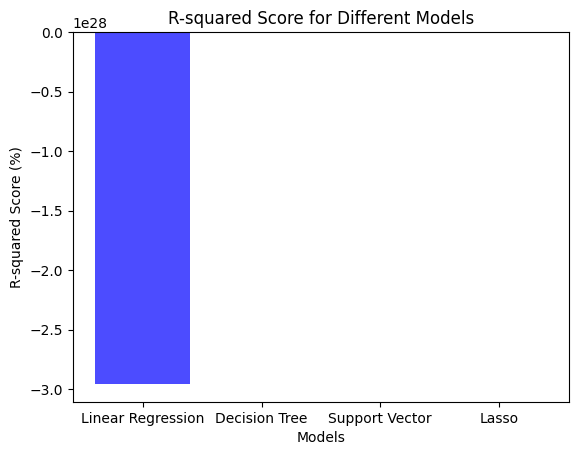

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Model predictions
y_pred_m1 = m1.predict(x_test)
y_pred_m2 = m2.predict(x_test)
y_pred_m3 = m3.predict(x_test)
y_pred_m4 = m4.predict(x_test)

# R-squared scores
r2_m1 = r2_score(y_test, y_pred_m1)
r2_m2 = r2_score(y_test, y_pred_m2)
r2_m3 = r2_score(y_test, y_pred_m3)
r2_m4 = r2_score(y_test, y_pred_m4)

# Convert R-squared scores to percentage
r2_m1_percentage = r2_m1 * 100
r2_m2_percentage = r2_m2 * 100
r2_m3_percentage = r2_m3 * 100
r2_m4_percentage = r2_m4 * 100

# Create a bar plot
models = ['Linear Regression', 'Decision Tree', 'Support Vector', 'Lasso']
r2_scores = [r2_m1_percentage, r2_m2_percentage, r2_m3_percentage, r2_m4_percentage]

plt.bar(models, r2_scores, color='b', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('R-squared Score (%)')
plt.title('R-squared Score for Different Models')
plt.show()


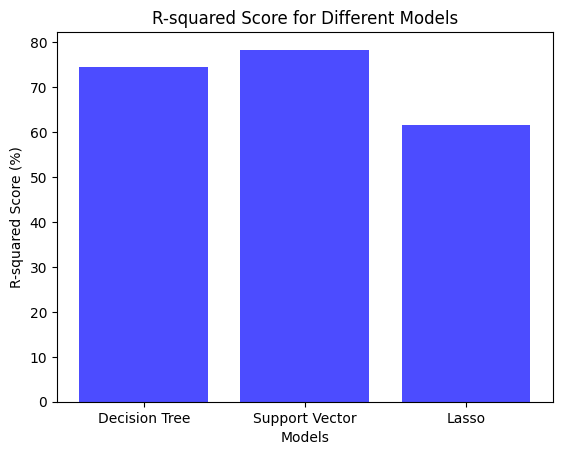

In [29]:
# Create a bar plot
models = ['Decision Tree', 'Support Vector', 'Lasso']
r2_scores = [r2_m2_percentage, r2_m3_percentage, r2_m4_percentage]

plt.bar(models, r2_scores, color='b', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('R-squared Score (%)')
plt.title('R-squared Score for Different Models')
plt.show()


In [30]:
# y_pred_m3 = m3.predict(one_hot_encoded_training_test)


In [31]:
import math
def round(final):
    rounded_values = [math.ceil(value) if value - int(value) >= 0.5 else math.floor(value) for value in final]
    int_values = [int(value) for value in rounded_values]
    
    return int_values

In [32]:
# import pandas as pd
# test = pd.read_csv('/kaggle/input/anyas-gojo-revival-space-shop/test.tsv', sep='\t')

# df = pd.DataFrame({'id': test['id'], 'sentiment': int_values})
# df.set_index('id', inplace=True)
# df.to_csv('output.csv')

In [33]:
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver='lbfgs')

model = Pipeline([('vectorizer', tvec), ('classifier', clf2)])
model.fit(X_train, Y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [34]:
predictions = model.predict(X_test)

In [35]:
confusion_matrix(predictions, Y_test)
print("Accuracy: ", accuracy_score(predictions, Y_test))

nlp = open('nlp.sav', 'wb') 
pickle.dump(model, nlp)
nlp.close()

Accuracy:  0.7420634920634921


In [36]:
final = model.predict(test_data['Reviews'])
# predictions = model.predict(test_data['Reviews'])

In [37]:
len(final)

630

In [38]:
int_values = round(final)
print(int_values)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 

In [39]:
import pandas as pd
test = pd.read_csv('/kaggle/input/anyas-gojo-revival-space-shop/test.tsv', sep='\t')

df = pd.DataFrame({'id': test['id'], 'sentiment': int_values})
df.set_index('id', inplace=True)
df.to_csv('output.csv')

In [40]:
#--------------------------------------------------------------------------------

In [41]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import spacy

In [42]:
# Read the dataset with name "Emotion_classify_Data.csv" and store it in a variable df
columns = ['verified_reviews', 'sentiment', 'feedback']
df = pd.read_csv('/kaggle/input/anyas-gojo-revival-space-shop/train.tsv', sep='\t') #, names = columns

# Print the shape of dataframe
print(df.shape)

# Print top 5 rows
df.head(5)

(2520, 10)


,date,time,id,reviewer name,reviewer address,contact number,variation,verified_reviews,sentiment,feedback
0,30-Jul-18,02:16:00,5138527,Theresa Diaz,"2373 Long Mews\nSouth Lorraine, FL 83715",7445448464,Black Plus,Love my new Echo Plus,5,1
1,30-Jul-18,20:13:24,7881409,Michael Wagner,"34120 James Well Apt. 930\nSouth Kenneth, AK 5...",(202)233-6662,Configuration: Fire TV Stick,Works really well.,5,1
2,29-Jul-18,03:20:48,5658396,Erin Rodriguez,"7996 Booth Mission\nTaylorport, AL 13457",(219)882-0705,Black Show,Echo Show is said to work with certain apps bu...,2,0
3,30-Jul-18,22:48:21,4317957,Christine Perez,USS Schaefer\nFPO AA 86432,291-900-6087,Heather Gray Fabric,Very cool product. Speaker sounds good with my...,5,1
4,23-Jul-18,12:36:42,7570569,Jamie Davila,"000 Kevin Cliffs Suite 674\nBrennanview, NM 77690",9527296610,Black Plus,So far I love it. It was easy to set up - if ...,5,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              2520 non-null   object
 1   time              2520 non-null   object
 2   id                2520 non-null   int64 
 3   reviewer name     2520 non-null   object
 4   reviewer address  2520 non-null   object
 5   contact number    2520 non-null   object
 6   variation         2520 non-null   object
 7   verified_reviews  2519 non-null   object
 8   sentiment         2520 non-null   int64 
 9   feedback          2520 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 197.0+ KB


In [44]:
df['sentiment'].value_counts()

sentiment
5    1816
4     372
1     131
3     127
2      74
Name: count, dtype: int64

In [45]:
#Todo: normalize values, 5 is too much :(

In [46]:
nlp = spacy.load("en_core_web_sm") 

In [47]:
# use this utility function to get the preprocessed text data
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [48]:
df.verified_reviews=df.verified_reviews.astype(str)
df['Preprocessed'] = df['verified_reviews'].apply(preprocess) 

In [49]:
df

,date,time,id,reviewer name,reviewer address,contact number,variation,verified_reviews,sentiment,feedback,Preprocessed
0,30-Jul-18,02:16:00,5138527,Theresa Diaz,"2373 Long Mews\nSouth Lorraine, FL 83715",7445448464,Black Plus,Love my new Echo Plus,5,1,love new Echo Plus
1,30-Jul-18,20:13:24,7881409,Michael Wagner,"34120 James Well Apt. 930\nSouth Kenneth, AK 5...",(202)233-6662,Configuration: Fire TV Stick,Works really well.,5,1,work
2,29-Jul-18,03:20:48,5658396,Erin Rodriguez,"7996 Booth Mission\nTaylorport, AL 13457",(219)882-0705,Black Show,Echo Show is said to work with certain apps bu...,2,0,Echo say work certain app cozi state work Echo...
3,30-Jul-18,22:48:21,4317957,Christine Perez,USS Schaefer\nFPO AA 86432,291-900-6087,Heather Gray Fabric,Very cool product. Speaker sounds good with my...,5,1,cool product Speaker sound good spotify blast
4,23-Jul-18,12:36:42,7570569,Jamie Davila,"000 Kevin Cliffs Suite 674\nBrennanview, NM 77690",9527296610,Black Plus,So far I love it. It was easy to set up - if ...,5,1,far love easy set anybody speaker great fu...
...,...,...,...,...,...,...,...,...,...,...,...
2515,12-Jun-18,14:34:57,40769,Dennis Wells,"416 Murphy Hill Suite 083\nPort Garyshire, RI ...",4454701228,Black,Bought this for my son and it didn’t work. He ...,1,0,buy son work return
2516,30-Jul-18,21:46:21,7343959,Jennifer Lutz,"46716 Jackson Common Suite 050\nWest Stephen, ...",(798)227-0483,Black Dot,Alexa is phenomenal!,5,1,Alexa phenomenal
2517,30-Jul-18,14:57:44,2100710,Kevin Hanson,"724 Miller Center Apt. 352\nSouth Maurice, ND ...",(472)841-0473,Heather Gray Fabric,The sound is amazing and many collections of a...,5,1,sound amazing collection music
2518,28-Jul-18,18:09:07,6703141,Justin Schneider,"149 Hall Valleys Suite 629\nBryantown, NV 69983",270-658-6063,Black Show,Love how it shows the song info on the screen ...,5,1,love show song info screen play time notificat...


In [50]:
le_model = LabelEncoder()
# df['sentiment'] = le_model.fit_transform(df['sentiment'])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df['Preprocessed'], df['sentiment'], 
                                                    test_size=0.2, random_state=42, stratify=df['sentiment'])

In [52]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (2016,)
Shape of X_test:  (504,)


In [53]:
# Create classifier
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (MultinomialNB()))         
])

In [54]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', MultinomialNB())])

In [55]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

0.7202380952380952
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        74
           5       0.72      1.00      0.84       363

    accuracy                           0.72       504
   macro avg       0.14      0.20      0.17       504
weighted avg       0.52      0.72      0.60       504



In [56]:
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (RandomForestClassifier()))         
])

In [57]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', RandomForestClassifier())])

In [58]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.8174603174603174
              precision    recall  f1-score   support

           1       0.75      0.35      0.47        26
           2       1.00      0.27      0.42        15
           3       1.00      0.35      0.51        26
           4       0.83      0.41      0.55        74
           5       0.81      0.99      0.89       363

    accuracy                           0.82       504
   macro avg       0.88      0.47      0.57       504
weighted avg       0.83      0.82      0.79       504



In [59]:
test_df = pd.read_csv('/kaggle/input/anyas-gojo-revival-space-shop/test.tsv', sep='\t')
test_df.head()

,date,time,id,reviewer name,reviewer address,contact number,variation,verified_reviews,feedback
0,29-Jul-18,16:47:11,6074908,Russell Hensley,"9059 Morales Run Suite 912\nSouth Charles, MH ...",6932290613,Heather Gray Fabric,I have the original Alexa and the Tap and so f...,1
1,28-Jul-18,17:49:58,1159008,Adam Baxter,"13728 Jones Mission Apt. 526\nSouth Tylerfurt,...",385-994-9458,Black Plus,Great product. More skills are needed. I love it.,1
2,30-Jul-18,16:46:29,1759753,Sarah Contreras,"7113 Pratt Plains\nPalmermouth, IN 02370",(738)354-8387,Configuration: Fire TV Stick,I will never buy anything Amazon makes again!T...,0
3,29-Jul-18,19:23:32,1861422,Tim Castillo,"93586 Cook Union Apt. 080\nMorganmouth, WI 51175",(294)877-6223,Black Plus,Not perfect but very good! A few times Alexa p...,1
4,28-Jul-18,16:15:25,3116018,Barry Young,69809 Harrington Meadows Apt. 256\nLake Courtn...,262-863-1391,Black Show,Kids like it for games. Showing the lyrics fo...,1


In [60]:
res = []

In [61]:
for i in range(len(test_df['verified_reviews'])):
    test_text = test_df['verified_reviews'][i]
    test_text_processed = [preprocess(test_text)]
    prediction = clf.predict(test_text_processed)
    res.append(prediction[0])

In [62]:
len(res)

630

In [63]:
res = round(res)

In [64]:
import pandas as pd
test = pd.read_csv('/kaggle/input/anyas-gojo-revival-space-shop/test.tsv', sep='\t')

df = pd.DataFrame({'id': test['id'], 'sentiment': res})
df.set_index('id', inplace=True)
df.to_csv('output_rfc.csv')

In [65]:
df.head()

,sentiment
id,
6074908,5
1159008,5
1759753,5
1861422,5
3116018,5


In [66]:
df['sentiment'].value_counts()

sentiment
5    568
4     38
3     11
1      8
2      5
Name: count, dtype: int64

In [67]:
test_text = test_df['verified_reviews'][1]


In [68]:
test_text_processed = [preprocess(test_text)]
test_text_processed

['great product skill need love']

In [69]:
test_text = clf.predict(test_text_processed)

In [70]:
print(round([test_text[0]]))

[5]


In [71]:
#----------------------------------------------------------------------

In [72]:
import pandas as pd
df = pd.read_csv('/kaggle/input/anyas-gojo-revival-space-shop/train.tsv', sep='\t') #, names = columns


In [73]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split


In [74]:
#  data preparation
df['text'] = df['feedback'].astype(str) + ' ' + df['verified_reviews'].astype(str)
texts = df['text'].values
sentiments = df['sentiment'].values

In [75]:
# Tokenize the text data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_inputs = tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors='pt')

# Convert sentiment to PyTorch tensor
labels = torch.tensor(sentiments)

# Create a TensorDataset
dataset = TensorDataset(tokenized_inputs.input_ids, tokenized_inputs.attention_mask, labels)

In [76]:
# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoader for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)

In [77]:
# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)  # 5 classes for sentiment 1-5

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [78]:
# # Fine-tuning loop
# epochs = 5
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# for epoch in range(epochs):
#     # Training loop
#     model.train()
#     for batch in train_dataloader:
#         input_ids, attention_mask, labels = batch
#         input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        
#         optimizer.zero_grad()
#         outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
#         loss = outputs.loss
#         loss.backward()
#         optimizer.step()

#     # Validation loop
#     model.eval()
#     val_loss = 0.0
#     total_batches = len(val_dataloader)
#     with torch.no_grad():
#         for batch in val_dataloader:
#             input_ids, attention_mask, labels = batch
#             input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

#             outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
#             val_loss += outputs.loss.item()

#     avg_val_loss = val_loss / total_batches
#     print(f"Epoch {epoch + 1}/{epochs} - Validation Loss: {avg_val_loss}")

In [79]:
# Save the fine-tuned model
# model.save_pretrained('fine_tuned_sentiment_model')